## Exam prep

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import cmocean
import matplotlib.pyplot as plt

#### Datasets used:

ECCO Ocean and Sea-Ice Surface Heat Fluxes - Monthly Mean 0.5 Degree (Version 4 Release 4) <br>
https://podaac.jpl.nasa.gov/dataset/ECCO_L4_HEAT_FLUX_05DEG_MONTHLY_V4R4

ECCO Ocean Temperature and Salinity - Monthly Mean 0.5 Degree (Version 4 Release 4) <br>
https://podaac.jpl.nasa.gov/dataset/ECCO_L4_TEMP_SALINITY_05DEG_MONTHLY_V4R4

ECCO Geometry Parameters for the 0.5 degree Lat-Lon Model Grid (Version 4 Release 4) <br>
https://podaac.jpl.nasa.gov/dataset/ECCO_L4_GEOMETRY_05DEG_V4R4?ids=&values=&search=ecco%20grid%20lat&provider=POCLOUD

*Time Span: 1992-Jan-01 to 2018-Jan-01*

### Import ecco data

Open and combine all NetCDF files together using the `xarray.open_mfdataset` function:

In [2]:
# list of shortnames for three datasets: ECCO geometry (1 file), heat fluxes, and temperature/salinity

ecco_geometry = "ECCO_L4_GEOMETRY_05DEG_V4R4"
ecco_heat = "ECCO_L4_HEAT_FLUX_05DEG_MONTHLY_V4R4"
ecco_temp_salt = "ECCO_L4_TEMP_SALINITY_05DEG_MONTHLY_V4R4"

In [3]:
# define root directory for location of all downloaded NetCDF files
root_dir = Path('../data/ECCO_V4r4_PODAAC')

# define the directory where the files specific to desired dataset are stored
nc_heat_dir = root_dir / ecco_heat
nc_temp_salt_dir = root_dir / ecco_temp_salt

In [4]:
heat_nc_files = list(nc_heat_dir.glob('*nc'))
temp_salt_nc_files = list(nc_temp_salt_dir.glob('*nc'))

print(f'number of files: {len(heat_nc_files)}')

number of files: 312


In [13]:
temp_salt_ds = xr.open_mfdataset(temp_salt_nc_files, parallel=True, data_vars='minimal',\
                                coords='minimal', compat='override')

temp_salt_ds

<xarray.Dataset>
Dimensions:         (time: 312, Z: 50, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * time            (time) datetime64[ns] 1992-01-16T18:00:00 ... 2017-12-16T...
  * Z               (Z) float32 -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
  * latitude        (latitude) float32 -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
    time_bnds       (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    latitude_bnds   (latitude, nv) float32 dask.array<chunksize=(360, 2), meta=np.ndarray>
    longitude_bnds  (longitude, nv) float32 dask.array<chunksize=(720, 2), meta=np.ndarray>
    Z_bnds          (Z, nv) float32 dask.array<chunksize=(50, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    THETA           (time, Z, latitude, longitude) float32 dask.array<chunksize=(1, 50, 360, 720), meta=np.ndarray>
    SALT            (time, Z, latitude, longitude) float32 dask.array<chunksize=(1, 50, 360, 720), meta=np.ndarray>
Attributes: (12/62)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on a regular lat-lon gri...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Temperature and Salinity - Mo...
    uuid:                            7e05edde-4159-11eb-9ce1-0cc47a3f47f1

In [77]:
heat_ds = xr.open_mfdataset(heat_nc_files, parallel=True, data_vars='minimal',\
                            coords='minimal', compat='override')

heat_ds

<xarray.Dataset>
Dimensions:         (time: 312, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * time            (time) datetime64[ns] 1992-01-16T18:00:00 ... 2017-12-16T...
  * latitude        (latitude) float32 -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
    time_bnds       (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    latitude_bnds   (latitude, nv) float32 dask.array<chunksize=(360, 2), meta=np.ndarray>
    longitude_bnds  (longitude, nv) float32 dask.array<chunksize=(720, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    EXFhl           (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFhs           (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFlwdn         (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFswdn         (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFqnet         (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    oceQnet         (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    SIatmQnt        (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    TFLUX           (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFswnet        (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFlwnet        (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    oceQsw          (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    SIaaflux        (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on a regular lat-lon grid. ...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            1992-02-01T00:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          1992-01-01T12:00:00
    title:                        ECCO Ocean and Sea-Ice Surface Heat Fluxes ...
    uuid:                         73ea7d5c-4158-11eb-8d61-0cc47a3f812d

In [7]:
geometry_ds = xr.open_dataset('../data/ECCO_V4r4_PODAAC/ECCO_L4_GEOMETRY_05DEG_V4R4/GRID_GEOMETRY_ECCO_V4r4_latlon_0p50deg.nc')
geometry_ds

<xarray.Dataset>
Dimensions:         (Z: 50, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * Z               (Z) float32 -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
  * latitude        (latitude) float32 -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
    latitude_bnds   (latitude, nv) float32 ...
    longitude_bnds  (longitude, nv) float32 ...
    Z_bnds          (Z, nv) float32 ...
Dimensions without coordinates: nv
Data variables:
    hFacC           (Z, latitude, longitude) float64 ...
    Depth           (latitude, longitude) float64 ...
    area            (latitude, longitude) float64 ...
    drF             (Z) float32 ...
    maskC           (Z, latitude, longitude) bool ...
Attributes: (12/57)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on a regular lat-lon gri...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    references:                      ECCO Consortium, Fukumori, I., Wang, O.,...
    source:                          The ECCO V4r4 state estimate was produce...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         This dataset provides geometric paramete...
    title:                           ECCO Geometry Parameters for the 0.5 deg...
    uuid:                            b4795c62-86e5-11eb-9c5f-f8f21e2ee3e0

variable `drF`: cell_thickness. distance between the upper and lower interfaces of the model grid cell (units: m) <br>

variable `area`: area of lat-lon grid cell (units: m^2)

The change in temperature of a water parcel is related to the change in energy:

&emsp;$\Delta E = C_p m \Delta T$

where $m$ is the mass of the water and $C_p$ is the specific heat of the sea water at constant pressure.

&emsp;$C_p$ = 3850 $J kg^{−1} °C^{−1}$ <br>
&emsp;$m$ = $\rho v$ <br>
&emsp;$\rho$ = 1025 $kg m^{-2}$

Therefore: <br>

&emsp;$\Delta E = C_p * \rho * v * (T - T_{ref})$

where $E$ is the total energy (in Joules) gained/lost by a water parcel with volume, $v$, and density, $\rho$, for a given temperature change ($T - T_{ref}$)

Energy is in Joules, heat flux is in W m^(-2)

heat flux (W m^(-2)) * Area (m^2) * time (s) = joules; 1 W = 1 J/s

The specific heat capacity means that ~4,000 joules of energy are required to heat 1.0 kilogram of sea water by 1.0°C 

In [ ]:
# find the modeled mean temperature change in the Labrador Sea for the winter months (DJFM) and see how this compares to the total energy loss derived in ECCO

In [15]:
# start with one month to get framework down

temp = temp_salt_ds.THETA

In [64]:
winter = (1,2,3,12)
summer = (6,7,8,9)

# winter = (11)
# summer = (8)

temp_1m_group = temp.groupby("time.month").mean()

temp_winter = temp_1m_group.isel(month=temp_1m_group.month.isin(win)).mean(dim="month")
temp_summer = temp_1m_group.isel(month=temp_1m_group.month.isin(summer)).mean(dim="month")

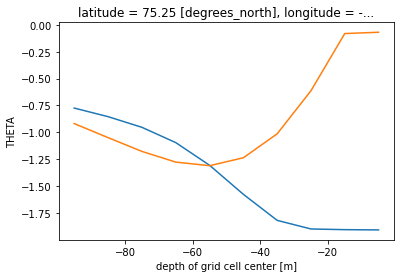

In [65]:
# temperature for melville bay cell down to 100 m
temp_winter.sel(latitude=75.25, longitude=-60.75, Z=slice(0,-100)).plot()
temp_summer.sel(latitude=75.25, longitude=-60.75, Z=slice(0,-100)).plot()

In [66]:
# it's only consistent through the upper ~20 meters so that is what we will use
temp_win_20m_avg = temp_winter.sel(latitude=75.25, longitude=-60.75, Z=slice(0,-20)).mean()
temp_sum_20m_avg = temp_summer.sel(latitude=75.25, longitude=-60.75, Z=slice(0,-20)).mean()

In [59]:
temp_win_20m_avg.values

array(-1.9063385, dtype=float32)

In [67]:
# volume of melville bay grid cell down to 20 meters deep
grid_cell = geometry_ds.sel(latitude=75.25, longitude=-60.75, Z=slice(0,-20))
volume = grid_cell.drF.sum() * grid_cell.area
volume # in m^3

<xarray.DataArray ()>
array(1.57398828e+10)
Coordinates:
    latitude   float32 75.25
    longitude  float32 -60.75

$\Delta E = C_p * \rho * v * (T - T_{ref})$

In [68]:
# energy change (in joules) going from winter to summer
E = 3850*1025*volume*(temp_sum_20m_avg-temp_win_20m_avg)

In [75]:
temp_sum_20m_avg.values

array(-0.07506268, dtype=float32)

In [73]:
(temp_sum_20m_avg-temp_win_20m_avg).values

array(1.8312758, dtype=float32)

In [69]:
# change to W/m^-2
# there are 2.6e6 per month (ECCO product is on monthly scale)
heat_flux = E/(grid_cell.area*2.6e6) # this assumes the temperature change takes place over a month
# therefore a net heat flux of 55.6 Wm^-2 over a month would achieve a 1.8 deg C temperature increase from winter to summer

In [70]:
heat_flux.values

array(55.589787, dtype=float32)

In [76]:
# compare to heat flux in model

In [90]:
winter = (1,2,3,12)
summer = (6,7,8,9)

# heat_1m_group = heat_ds.oceQnet.groupby("time.month").mean()
# heat_1m_group = heat_ds.EXFqnet.groupby("time.month").mean()
heat_1m_group = heat_ds.SIatmQnt.groupby("time.month").mean()

heat_winter = heat_1m_group.isel(month=heat_1m_group.month.isin(win)).mean(dim="month")
heat_summer = heat_1m_group.isel(month=heat_1m_group.month.isin(summer)).mean(dim="month")

heat_win_20m_avg = heat_winter.sel(latitude=75.25, longitude=-60.75)
heat_sum_20m_avg = heat_summer.sel(latitude=75.25, longitude=-60.75)

In [91]:
net = heat_win_20m_avg + heat_sum_20m_avg

In [92]:
net.values

array(-19.155224, dtype=float32)